In [1]:
import time
import numpy as np
import xarray as xr
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import matplotlib.gridspec as gridspec
# import matplotlib.patches as mpatches
# import matplotlib.dates as mdates
# import copy
# import seaborn as sns
%matplotlib inline

In [2]:
# PHASE = 'Summer'
PHASE = 'Winter'

# Specify regions
if PHASE == 'Summer':
    lon_bounds = [-180, 180]
    lat_bounds = [-15, 30]
    year = 2016
if PHASE == 'Winter':
    lon_bounds = [-180, 180]
    lat_bounds = [-20, 15]
    year = 2020
    
# Ocean vs. Land threshold (%)
ocean_thresh = 99
land_thresh = 20

dir_root = '/pscratch/sd/f/feng045/DYAMOND/'
dir_dpr = f'{dir_root}GPM_DYAMOND/DPR/'
# dir_dpr_phase = f'{dir_dpr}{year}/'
# basename_dpr = '2A.GPM.DPR.V9-20211125.20200131-S010102-E023334.033655.V07A_'
# basename_dpr = '2A.GPM.DPR.V9-20211125.'

# dir_imerg = '/pscratch/sd/f/feng045/DYAMOND/OLR_Precipitation_combined/'
# file_imerg = f'{dir_imerg}olr_pcp_{PHASE}_OBS.nc'
# file_imergv7 = f'{dir_imerg}olr_pcp_{PHASE}_OBSv7.nc'

# # Find all DPR files
# files_dpr = sorted(glob.glob(f'{dir_dpr_phase}{basename_dpr}*regridded.nc'))
# nfiles_dpr = len(files_dpr)
# print(f'Number of DPR files: {nfiles_dpr}')

# Landmask file
# file_lm = f'{dir_root}maps/IMERG_landmask_180W-180E_60S-60N.nc'

figdir = f'/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/{PHASE}/figures/MCSMIP/'

file_dpr = f'{dir_dpr}rainrate_hist_{PHASE}_DPR.nc'

In [3]:
ds = xr.open_dataset(file_dpr)
bins_pcp_c = ds.bins_pcp
lon_bounds = ds.attrs['lon_bounds']
lat_bounds = ds.attrs['lat_bounds']
ds

<xarray.Dataset>
Dimensions:                 (bins_pcp: 299)
Coordinates:
  * bins_pcp                (bins_pcp) int64 1 2 3 4 5 6 ... 295 296 297 298 299
Data variables: (12/15)
    total_pcp_dpr           (bins_pcp) int64 ...
    total_pcp_imerg_v6_in   (bins_pcp) int64 ...
    total_pcp_imerg_v7_in   (bins_pcp) int64 ...
    total_pcp_imerg_v6_out  (bins_pcp) int64 ...
    total_pcp_imerg_v7_out  (bins_pcp) int64 ...
    ocean_pcp_dpr           (bins_pcp) int64 ...
    ...                      ...
    ocean_pcp_imerg_v7_out  (bins_pcp) int64 ...
    land_pcp_dpr            (bins_pcp) int64 ...
    land_pcp_imerg_v6_in    (bins_pcp) int64 ...
    land_pcp_imerg_v7_in    (bins_pcp) int64 ...
    land_pcp_imerg_v6_out   (bins_pcp) int64 ...
    land_pcp_imerg_v7_out   (bins_pcp) int64 ...
Attributes:
    title:       GPM DPR precipitation histogram
    lon_bounds:  [-180  180]
    lat_bounds:  [-20  15]
    contact:     Zhe Feng, zhe.feng@pnnl.gov
    created_on:  Tue Jun  4 12:24:42 2024

In [4]:
pcp_dpr_pdf = ds.total_pcp_dpr / np.nansum(ds.total_pcp_dpr)

pcp_dpr_o_pdf = ds.ocean_pcp_dpr / np.nansum(ds.ocean_pcp_dpr)
pcp_dpr_l_pdf = ds.land_pcp_dpr / np.nansum(ds.land_pcp_dpr)

In [5]:
pcp_imerg_v6_in_pdf = ds.total_pcp_imerg_v6_in / np.nansum(ds.total_pcp_imerg_v6_in)
pcp_imerg_v6_out_pdf = ds.total_pcp_imerg_v6_out / np.nansum(ds.total_pcp_imerg_v6_out)

pcp_imerg_v6_o_in_pdf = ds.ocean_pcp_imerg_v6_in / np.nansum(ds.ocean_pcp_imerg_v6_in)
pcp_imerg_v6_o_out_pdf = ds.ocean_pcp_imerg_v6_out / np.nansum(ds.ocean_pcp_imerg_v6_out)

pcp_imerg_v6_l_in_pdf = ds.land_pcp_imerg_v6_in / np.nansum(ds.land_pcp_imerg_v6_in)
pcp_imerg_v6_l_out_pdf = ds.land_pcp_imerg_v6_out / np.nansum(ds.land_pcp_imerg_v6_out)

In [6]:
pcp_imerg_v7_in_pdf = ds.total_pcp_imerg_v7_in / np.nansum(ds.total_pcp_imerg_v7_in)
pcp_imerg_v7_out_pdf = ds.total_pcp_imerg_v7_out / np.nansum(ds.total_pcp_imerg_v7_out)

pcp_imerg_v7_o_in_pdf = ds.ocean_pcp_imerg_v7_in / np.nansum(ds.ocean_pcp_imerg_v7_in)
pcp_imerg_v7_o_out_pdf = ds.ocean_pcp_imerg_v7_out / np.nansum(ds.ocean_pcp_imerg_v7_out)

pcp_imerg_v7_l_in_pdf = ds.land_pcp_imerg_v7_in / np.nansum(ds.land_pcp_imerg_v7_in)
pcp_imerg_v7_l_out_pdf = ds.land_pcp_imerg_v7_out / np.nansum(ds.land_pcp_imerg_v7_out)

In [7]:
# Make lat bound formats for plotting
lat_min = f'{-1*lat_bounds[0]}°S' if lat_bounds[0] < 0 else f'{lat_bounds[0]}°N'
lat_max = f'{-1*lat_bounds[1]}°S' if lat_bounds[1] < 0 else f'{lat_bounds[1]}°N'
f'({PHASE}, {lat_min} - {lat_max})'

'(Winter, 20°S - 15°N)'

In [8]:
if PHASE == 'Summer':
    panel_numbers = ['(a)','(c)']
elif PHASE == 'Winter':
    panel_numbers = ['(b)','(d)']
panel_numbers

['(b)', '(d)']

# Plot rain rate PDF

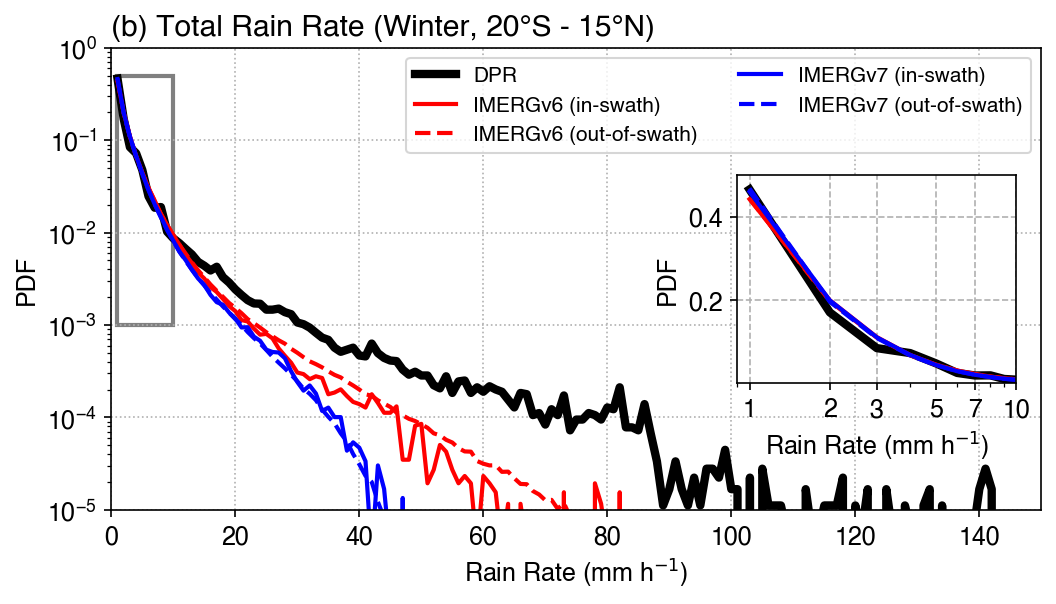

In [9]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Helvetica'
lw = 2
xlabels = 'Rain Rate (mm h$^{-1}$)'
ylabels = 'PDF'

fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=150)
ax.plot(bins_pcp_c, pcp_dpr_pdf, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, pcp_imerg_v6_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v6_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
ax.set_yscale('log')
ax.set_xlim(0, 150)
ax.set_ylim(1e-5, 1)
ax.grid(ls=':')
ax.legend(ncol=2, fontsize=10)
ax.set_xlabel(xlabels)
ax.set_ylabel(ylabels)
ax.set_title(f'{panel_numbers[0]} Total Rain Rate ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Inset plot
x_sub = (0.9, 10)
y_sub = (1e-3, 0.5)
yscale_sub = 'linear'
xscale_sub = 'log'
xticks_sub = [1, 2, 3, 5, 7, 10,]
box_color = 'gray'
line_width = 2
width = '30%'
height = '45%'
loc = 'center right'
borderpad = 1
# Create the inset plot
axins = inset_axes(ax, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, pcp_dpr_pdf, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, pcp_imerg_v6_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v6_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)

figname = f'{figdir}global_total_pcp_pdf_dpr_imerg.png'
fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')

/tmp/ipykernel_1438990/1120811692.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


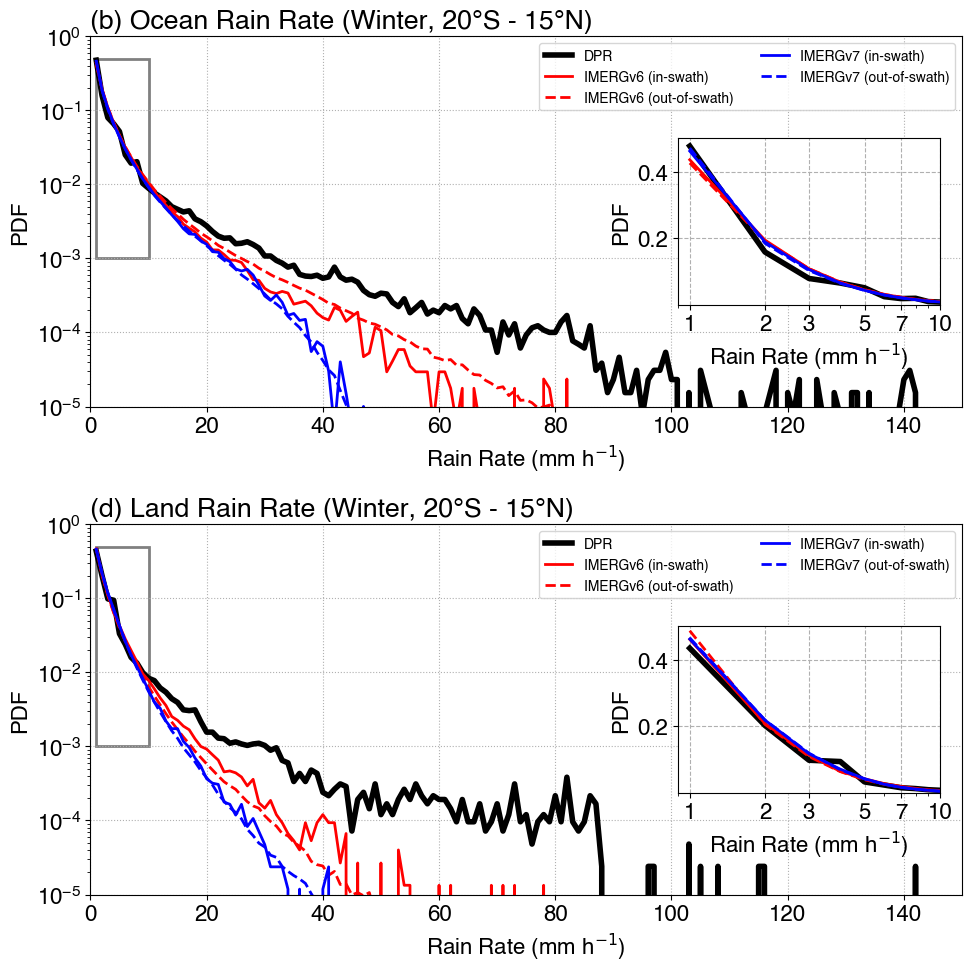

In [10]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
lw = 2
xlabels = 'Rain Rate (mm h$^{-1}$)'
ylabels = 'PDF'
x_sub = (0.9, 10)
y_sub = (1e-3, 0.5)
yscale_sub = 'linear'
xscale_sub = 'log'
xticks_sub = [1, 2, 3, 5, 7, 10,]
box_color = 'gray'
line_width = 2
width = '30%'
height = '45%'
loc = 'center right'
borderpad = 1

fig, axes = plt.subplots(2, 1, figsize=(10,10), dpi=100)
ax = axes[0]
ax.plot(bins_pcp_c, pcp_dpr_o_pdf, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, pcp_imerg_v6_o_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v6_o_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_o_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_o_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0, 150)
ax.set_ylim(1e-5, 1)
# ax.set_xticks(xticks)
# ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid(ls=':')
ax.legend(ncol=2, fontsize=10)
ax.set_xlabel(xlabels)
ax.set_ylabel(ylabels)
ax.set_title(f'{panel_numbers[0]} Ocean Rain Rate ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Create the inset plot
axins = inset_axes(ax, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, pcp_dpr_o_pdf, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, pcp_imerg_v6_o_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v6_o_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_o_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_o_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)


#------------------------------------------------
ax = axes[1]
ax.plot(bins_pcp_c, pcp_dpr_l_pdf, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, pcp_imerg_v6_l_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v6_l_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_l_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_l_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0, 150)
ax.set_ylim(1e-5, 1)
# ax.set_xticks(xticks)
# ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid(ls=':')
ax.legend(ncol=2, fontsize=10)
ax.set_xlabel(xlabels)
ax.set_ylabel(ylabels)
ax.set_title(f'{panel_numbers[1]} Land Rain Rate ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Create the inset plot
axins = inset_axes(ax, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, pcp_dpr_l_pdf, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, pcp_imerg_v6_l_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v6_l_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_l_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_l_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)

fig.tight_layout()
figname = f'{figdir}global_total_pcp_fractional_pdf_dpr_imerg_ocean_land.png'
fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')